In [1]:
# Imports
import pandas as pd
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
# Countys dataset
file_path = r'C:\Users\utilizador\Documents\a_hjoaquim\a_semestre2-5oano\PSn\pratica\guia-final\dataset.csv'
df = pd.read_csv(file_path, index_col='Municipios')

#### Shape-file treatment

In [3]:
# Shapefile 
geo_path = r'C:\Users\utilizador\Documents\a_hjoaquim\a_semestre2-5oano\PSn\pratica\guia-final\ShapeFiles\gadm36_PRT.gpkg'
shapefile = gpd.read_file(geo_path)
shapefile['join'] = shapefile['NAME_1'] + shapefile['NAME_2']
shp = shapefile.dissolve(by='join')
munGeo = shp['NAME_2'].to_list()

In [4]:
# Strip every county in the list, wich had a space in the end.
df.index = [mun.strip() for mun in df.index]
# Removing 'Portugal' from the county list and also removing white spaces that were in the list itself.
listOfCountys = df.index.unique().to_list()

In [5]:
# Renaming columns to match with df
shp.loc[shp['NAME_2']=='Ponte de Sôr','NAME_2'] = 'Ponte de Sor'
shp.loc[shp['NAME_2']=='Praia da Vitória','NAME_2'] = 'Vila da Praia da Vitória'
shp.loc[((shp['NAME_2']=='Calheta') & (shp['NAME_1'] == 'Azores')),'NAME_2'] = 'Calheta [R.A.A.]'
shp.loc[((shp['NAME_2']=='Calheta') & (shp['NAME_1']=='Madeira')),'NAME_2'] = 'Calheta [R.A.M.]'
shp.loc[((shp['NAME_2']=='Lagoa') & (shp['NAME_1']=='Azores')),'NAME_2'] = 'Lagoa [R.A.A.]'

In [6]:
# Renaming column
shp=shp.rename(columns={'NAME_1':'Distrito'})
# Changing index so it county based again
shp.index=shp['NAME_2']
madeiraCountys = shp[shp['Distrito']=='Madeira'].index.to_list()
azoresCountys = shp[shp['Distrito']=='Azores'].index.to_list()
continentCountys = shp[(shp['Distrito']!='Azores') & (shp['Distrito']!='Madeira')].index.to_list()

In [7]:
# Adding info that is in the shapefile to the original excel
# Pandas library automatically find the indexes for us, so we don't have to bother
df['Distrito'] = shp['Distrito']
df['geometry'] = shp['geometry']
df

,Ano,Indicador per Capita,Percentagem de Poder de Compra,Sem escolaridade,Básico 1º Ciclo,Básico 2º ciclo,Básico 3º ciclo,Secundário,Superior,População residente,...,Ecrãs de cinema,Despesas da Câmara Municipal em cultura e desporto (%),Pensões da Segurança Social,Pensões da Caixa Geral de Aposentações,Pensões da Segurança Social e da CGA em % da população residente,Beneficiários do Rendimento Social de Inserção (RSI),Desempregados inscritos nos centros de emprego,Desempregados inscritos nos centros de emprego em % da população residente,Distrito,geometry
Abrantes,2010,86.75,0.320,12.8,31.1,11.5,11.5,14.3,10.3,39637,...,1,12.9,14640,2313,49,1337,2160,9,Santarém,"POLYGON ((-8.08013 39.27783, -8.08038 39.27787..."
Abrantes,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35254,...,1,0.0,13879,2717,53,1005,1358,6,Santarém,"POLYGON ((-8.08013 39.27783, -8.08038 39.27787..."
Águeda,2010,85.17,0.384,10.0,30.5,15.9,15.9,13.6,9.7,47875,...,1,7.2,14295,1337,38,1032,2147,7,Aveiro,"POLYGON ((-8.46235 40.50518, -8.46226 40.50523..."
Águeda,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46034,...,1,0.0,14658,1534,40,629,866,3,Aveiro,"POLYGON ((-8.46235 40.50518, -8.46226 40.50523..."
Aguiar da Beira,2010,61.58,0.032,25.4,35.8,9.4,9.4,10.6,4.6,5539,...,0,27.6,2233,181,50,166,200,6,Guarda,"POLYGON ((-7.52176 40.69909, -7.52961 40.69447..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viseu,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97120,...,13,0.0,23685,7001,36,2625,2951,5,Viseu,"POLYGON ((-8.00603 40.54524, -8.00588 40.54578..."
Vizela,2010,72.06,0.163,9.9,34.3,17.4,17.4,11.9,6.1,23739,...,3,9.2,4467,285,24,621,2012,12,Braga,"POLYGON ((-8.27761 41.35191, -8.27775 41.35014..."
Vizela,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23869,...,3,0.0,6084,365,31,103,772,5,Braga,"POLYGON ((-8.27761 41.35191, -8.27775 41.35014..."
Vouzela,2010,60.99,0.061,14.7,36.7,13.7,13.7,11.2,7.1,10656,...,0,16.6,3692,438,45,160,323,5,Viseu,"POLYGON ((-8.02150 40.70087, -8.02162 40.70065..."


In [8]:
# To do a preliminar analysis we will devide the dataset in two, for the year of 2010 and 2019
df2010 = df.loc[df['Ano'] == 2010]
df2019 = df.loc[df['Ano'] == 2019]

### 1. The first question that we will try to answer is:
### "Does the number of education establishments influence the culture?"
Assumptions: We'll only work with the year of 2010 for now

In [9]:
# Em locais onde existe maior número de instituições de ensino, a população é mais educada?
# Sem escolaridade 	Básico 1º Ciclo 	Básico 2º ciclo 	Básico 3º ciclo 	Secundário 	Superior
# Estabelecimentos do ensino pré-escolar 	Estabelecimentos do 1.º ciclo do ensino básico 	Estabelecimentos do 2.º ciclo do ensino básico 	Estabelecimentos do 3.º ciclo do ensino básico 	Estabelecimentos do ensino secundário 	Estabelecimentos do ensino superior 

df2010_selectedColumns = df2010[['Básico 1º Ciclo','Básico 2º ciclo','Básico 3º ciclo','Secundário','Superior','Estabelecimentos do ensino pré-escolar','Estabelecimentos do 1.º ciclo do ensino básico','Estabelecimentos do 2.º ciclo do ensino básico','Estabelecimentos do 3.º ciclo do ensino básico','Estabelecimentos do ensino secundário','Estabelecimentos do ensino superior', 'Distrito', 'geometry']]
df2010_selectedColumns

,Básico 1º Ciclo,Básico 2º ciclo,Básico 3º ciclo,Secundário,Superior,Estabelecimentos do ensino pré-escolar,Estabelecimentos do 1.º ciclo do ensino básico,Estabelecimentos do 2.º ciclo do ensino básico,Estabelecimentos do 3.º ciclo do ensino básico,Estabelecimentos do ensino secundário,Estabelecimentos do ensino superior,Distrito,geometry
Abrantes,31.1,11.5,11.5,14.3,10.3,33,31,4,6,4,1,Santarém,"POLYGON ((-8.08013 39.27783, -8.08038 39.27787..."
Águeda,30.5,15.9,15.9,13.6,9.7,36,27,5,7,2,1,Aveiro,"POLYGON ((-8.46235 40.50518, -8.46226 40.50523..."
Aguiar da Beira,35.8,9.4,9.4,10.6,4.6,7,5,1,1,1,0,Guarda,"POLYGON ((-7.52176 40.69909, -7.52961 40.69447..."
Alandroal,35.6,13.6,13.6,10.0,5.0,4,8,1,1,1,0,Évora,"POLYGON ((-7.34125 38.46282, -7.34105 38.46292..."
Albergaria-a-Velha,29.0,17.7,17.7,13.0,9.5,24,21,4,4,3,0,Aveiro,"POLYGON ((-8.52773 40.60947, -8.52828 40.60947..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vimioso,38.2,11.1,11.1,8.5,5.7,2,2,1,1,0,0,Bragança,"POLYGON ((-6.53276 41.44992, -6.53316 41.44990..."
Vinhais,39.9,14.2,14.2,8.7,5.0,9,5,1,1,1,0,Bragança,"POLYGON ((-7.02873 41.67302, -7.02891 41.67297..."
Viseu,25.7,11.3,11.3,16.4,17.8,75,71,11,14,6,9,Viseu,"POLYGON ((-8.00603 40.54524, -8.00588 40.54578..."
Vizela,34.3,17.4,17.4,11.9,6.1,11,12,4,5,2,0,Braga,"POLYGON ((-8.27761 41.35191, -8.27775 41.35014..."


In [10]:
# As we can see, we still have lots of columns to analyse, so, to simplify the analysis we'll join some columns
# superior = ensino-superior
# middle = 3º-ciclo + secundario
# low = 2º-ciclo and below

df2010_establecimentosLow = df2010[['Estabelecimentos do ensino pré-escolar','Estabelecimentos do 1.º ciclo do ensino básico','Estabelecimentos do 2.º ciclo do ensino básico']]
df2010_establecimentosMiddle = df2010[['Estabelecimentos do 3.º ciclo do ensino básico', 'Estabelecimentos do ensino secundário']]
df2010_establecimentosSuperior = df2010[['Estabelecimentos do ensino superior']]
df2010_pplLow = df2010[['Básico 2º ciclo','Básico 1º Ciclo']]
df2010_pplMiddle = df2010[['Básico 3º ciclo', 'Secundário']]
df2010_pplSuperior = df2010[['Superior']]


d = {'Municipios': df2010.index.tolist(),
     'qty-Est-Superior': df2010_establecimentosSuperior.sum(axis=1).to_frame()[0].tolist(),
     'ppl-Superior-Ed': df2010_pplLow.sum(axis=1).to_frame()[0].tolist(),
     'qty-Est-Middle': df2010_establecimentosMiddle.sum(axis=1).to_frame()[0].tolist(),
     'ppl-Middle-Ed': df2010_pplMiddle.sum(axis=1).to_frame()[0].tolist(),
     'qty-Est-Low': df2010_establecimentosLow.sum(axis=1).to_frame()[0].tolist(),
     'ppl-Low-Ed': df2010_pplSuperior.sum(axis=1).to_frame()[0].tolist(),
     'Distrito': df2010['Distrito'].tolist(),
     'geometry': df2010['geometry'].tolist(),
    }
d1 = {'Municipios': df2010.index.tolist(),
      'ppl-Superior-Ed': df2010_pplLow.sum(axis=1).to_frame()[0].tolist(),
      'ppl-Middle-Ed': df2010_pplMiddle.sum(axis=1).to_frame()[0].tolist(),
      'ppl-Low-Ed': df2010_pplSuperior.sum(axis=1).to_frame()[0].tolist(),
     }
d2 = {'Municipios': df2010.index.tolist(),
      'qty-Est-Superior': df2010_establecimentosSuperior.sum(axis=1).to_frame()[0].tolist(),
      'qty-Est-Middle': df2010_establecimentosMiddle.sum(axis=1).to_frame()[0].tolist(),
      'qty-Est-Low': df2010_establecimentosLow.sum(axis=1).to_frame()[0].tolist(),
     }

df_qtyEstablecimentos = pd.DataFrame(data=d2)
df_pplEnsino = pd.DataFrame(data=d1)
df_qtyEstablecimentos_VS_Ensino = pd.DataFrame(data=d)
df_qtyEstablecimentos_VS_Ensino

,Municipios,qty-Est-Superior,ppl-Superior-Ed,qty-Est-Middle,ppl-Middle-Ed,qty-Est-Low,ppl-Low-Ed,Distrito,geometry
0,Abrantes,1,42.6,10,25.8,68,10.3,Santarém,POLYGON ((-8.080126762390137 39.27783203125006...
1,Águeda,1,46.4,9,29.5,68,9.7,Aveiro,POLYGON ((-8.462350845336914 40.50518035888678...
2,Aguiar da Beira,0,45.2,2,20.0,13,4.6,Guarda,POLYGON ((-7.521759986877385 40.69908523559576...
3,Alandroal,0,49.2,2,23.6,13,5.0,Évora,"POLYGON ((-7.341249942779484 38.4628181457519,..."
4,Albergaria-a-Velha,0,46.7,7,30.7,49,9.5,Aveiro,"POLYGON ((-8.527728080749455 40.6094703674317,..."
...,...,...,...,...,...,...,...,...,...
303,Vimioso,0,49.3,1,19.6,5,5.7,Bragança,POLYGON ((-6.532758235931396 41.44991683959955...
304,Vinhais,0,54.1,2,22.9,15,5.0,Bragança,POLYGON ((-7.028726100921574 41.67301940917969...
305,Viseu,9,37.0,20,27.7,157,17.8,Viseu,POLYGON ((-8.006034851074219 40.54524230957037...
306,Vizela,0,51.7,7,29.3,27,6.1,Braga,POLYGON ((-8.277605056762695 41.35190582275396...


In [11]:
def printMap(data,area,title,studyVar):
    cmap = plt.cm.viridis
    ax = plt.gca()
    for m in area:
        muni = gpd.GeoDataFrame(data.loc[m].to_frame().T)
        value = data.loc[m][studyVar]
        colorCode = mpl.colors.to_hex(cmap(value)[0:3])
        muni.plot(color=colorCode,ax=ax)
    plt.title(title)
    plt.show()

In [12]:
# We're using this coloration in our maps
from IPython.display import Image
Image("img/viridis.png")

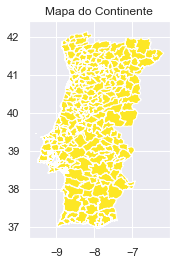

In [13]:
printMap(df_qtyEstablecimentos_VS_Ensino.set_index('Municipios'), continentCountys,'Mapa do Continente', 'ppl-Superior-Ed')

#### As we can see, that's not an easy task to get conclusions out of this analysis, since we still have lots of data to look into.
#### So, in the following cells, let's try a pragmatic approach and reduce our dataset.
#### We will choose now 5 counties from the interior and another 5 from the litoral. Those will be ones that historicaly have history of more conservative lifestyle and the others tendecially more academic and forward thinking.

Such as:

Litoral: Lisbon, Oporto, Coimbra, Setubal, Braga

Interior: Evora, Beja, Aljustrel, Lamego, Brangança


#### Important Disclaimer: 
As we can see, in the litoral choosed counties are some of the biggets cities in the country and the much bigger poppulation's density, so it is probably a very fair comparison. Despite that, Evora, Beja and Bragança also have universities.

In [14]:
litoral = ['Lisboa', 'Porto', 'Coimbra', 'Setúbal', 'Braga']
interior = ['Aljustrel', 'Évora', 'Beja', 'Lamego', 'Bragança']

In [15]:
dfLitoral = df_qtyEstablecimentos_VS_Ensino[df_qtyEstablecimentos_VS_Ensino['Municipios'].isin(litoral)]
dfLitoral

,Municipios,qty-Est-Superior,ppl-Superior-Ed,qty-Est-Middle,ppl-Middle-Ed,qty-Est-Low,ppl-Low-Ed,Distrito,geometry
51,Braga,5,35.3,39,30.3,216,19.2,Braga,POLYGON ((-8.409993171691895 41.47803878784185...
78,Coimbra,18,30.4,43,25.8,180,26.9,Coimbra,POLYGON ((-8.376369476318359 40.15731430053711...
124,Lisboa,74,32.6,170,30.0,565,19.6,Lisboa,(POLYGON ((-9.229633331298828 38.6952133178712...
209,Porto,42,34.4,111,25.9,301,25.3,Porto,(POLYGON ((-8.610569000244141 41.1396064758300...
251,Setúbal,4,34.0,19,30.3,107,15.0,Setúbal,(POLYGON ((-8.995063781738224 38.4619979858398...


In [16]:
def makePlot(countyName, x, delCols, isLit=True):
    
    if(isLit):
        y = dfLitoral[dfLitoral['Municipios']==countyName].copy().drop(labels=delCols, axis=1).values.tolist()[0]
    else:
        y = dfInterior[dfInterior['Municipios']==countyName].copy().drop(labels=delCols, axis=1).values.tolist()[0]

    New_Colors = ['green','green','purple','purple','teal','teal']
    plt.title(countyName, fontsize=14);plt.bar(x, y, color=New_Colors)
    plt.grid(True); plt.show()

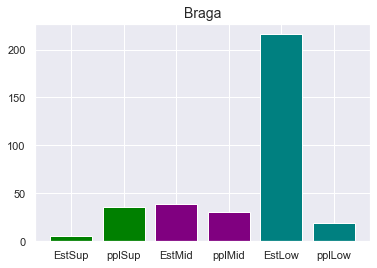

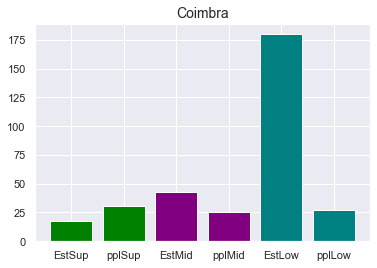

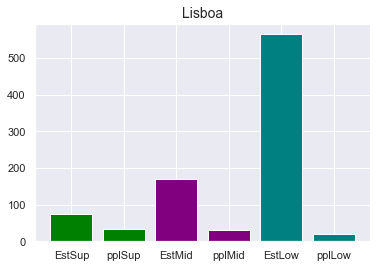

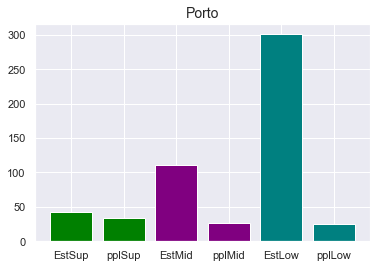

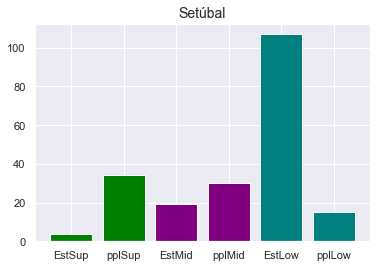

[None, None, None, None, None]

In [17]:
colsToDelete = ['geometry', 'Distrito', 'Municipios']
features = ['EstSup', 'pplSup', 'EstMid', 'pplMid', 'EstLow', 'pplLow']
[makePlot(a, features, colsToDelete) for a in dfLitoral['Municipios'].tolist()]

In [18]:
# As we can see, the low-education is not relevant at all.
# As expected, every county have lots of low-education establishments
# however, the percentage of people with that kind of education is not relevant.

# Let's repeat the exact same process but withouth low-education related info.

In [19]:
dfInterior = df_qtyEstablecimentos_VS_Ensino[df_qtyEstablecimentos_VS_Ensino['Municipios'].isin(interior)]
dfInterior

,Municipios,qty-Est-Superior,ppl-Superior-Ed,qty-Est-Middle,ppl-Middle-Ed,qty-Est-Low,ppl-Low-Ed,Distrito,geometry
15,Aljustrel,0,42.9,3,24.0,19,8.0,Beja,POLYGON ((-8.185379981994629 37.78875350952143...
45,Beja,4,33.9,9,27.4,49,16.1,Beja,POLYGON ((-7.912732124328613 37.80441284179693...
52,Bragança,5,36.0,10,25.5,45,18.0,Bragança,POLYGON ((-6.747649192810059 41.54947662353521...
92,Évora,2,33.3,13,29.6,69,18.5,Évora,POLYGON ((-7.922358989715519 38.35601806640631...
122,Lamego,2,42.7,12,26.9,63,11.7,Viseu,POLYGON ((-7.788080215454102 41.03558349609375...


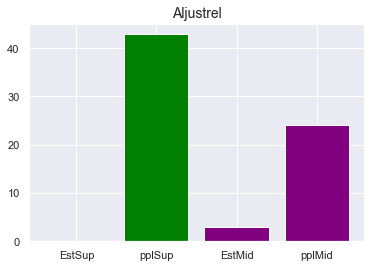

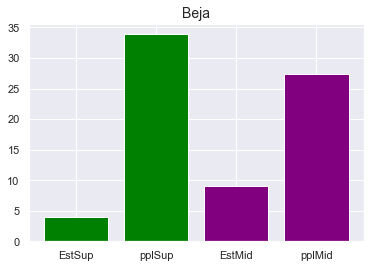

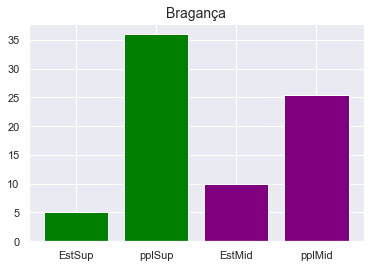

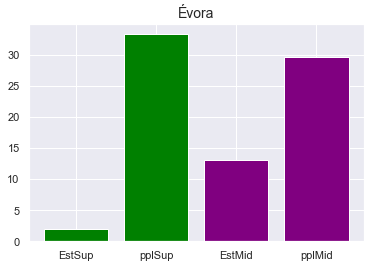

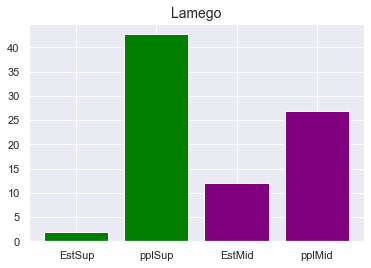

[None, None, None, None, None]

In [21]:
colsToDelete = ['geometry', 'Distrito', 'Municipios', 'qty-Est-Low', 'ppl-Low-Ed']
features = ['EstSup', 'pplSup', 'EstMid', 'pplMid']
[makePlot(a, features,colsToDelete, False) for a in dfInterior['Municipios'].tolist()]

As we can see, the number of establishments does not look like it is very much related to the percentage of people with a given education.

However, we're alredy seing that those counties have around 30% or above of people with a Superior Education, this can be interesting latter on.

In [ ]:
dfInterior = df_qtyEstablecimentos_VS_Ensino[df_qtyEstablecimentos_VS_Ensino['Municipios'].isin(interior)]
dfInterior

In [ ]:
# Let's do the same analysis for the interior counties now

colsToDelete = ['geometry', 'Distrito', 'Municipios', 'qty-Est-Low', 'ppl-Low-Ed']
features = ['EstSup', 'pplSup', 'EstMid', 'pplMid']
[makePlot(a, features,colsToDelete, False) for a in dfInterior['Municipios'].tolist()]

Contrary to our expectations the choosen counties in the interior of Portugal actually have a pretty significant ammout of people with superior education.

Despite having much less institutions (probably due to population's density) the probabilities almost don't vary, at all, when campared with the litoral counties.
Actually, and surprisingly, Aljustrel, wich is a county deep in Alentejo, surpass 40% of people with superior education.

This kind of phenomena, obviously, would require a much scientific aproch to take any bigger conclusion; since we're not taking into account any other sociological features.

#### Maybe, this absence of variation explains why, the above Portugal (continental) map is almost with just one colour, that's because there is no significant variation in education levels across counties.

### Since we could not take any big conclusion out of the above analysis, let's try to correlate other variables with cultural aspects.

In [ ]:
corr_matrix = df2010.corr()
corr_matrix

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
# Let's look into our cultural features and try to extract the most relevant correlations

culturalFeatures = ['Ecrãs de cinema', 'Museus', 'Sessões de espectáculos ao vivo']

for row in corr_matrix:
    if(row not in culturalFeatures):
        corr_matrix.drop([row], inplace = True)
        
corr_matrix

### 2. The second question that we will try to answer is:
### "Does the number of education establishments influence the culture?"
Assumptions: We'll only work with the year of 2010 for now

After a fast analysis we can almost immediatly find a correlation that caught our eye!

If we look into "Percentagem Poder de Compra", we spot the following:
- Correlation with "Museus": 0.900599
- Correlation with "Sessões de espectáculos ao vivo": 0.969423
- Correlation with "Ecrãs de cinema": 0.869335


In [ ]:
printMap(df2010, continentCountys, 'Mapa do Continente', 'Percentagem de Poder de Compra')

In [ ]:
# Lighter colors have more purchase power, while darker have less.
# Let's find out below wich are the 5 counties with the higher purchase power
# and the 5 with the lower.

countyList = df2010.index.tolist()
purchasePower = df2010['Percentagem de Poder de Compra'].tolist()

countyPP = dict(); i = 0
for county in countyList:
    countyPP.update({county:purchasePower[i]})
    i = i + 1

dict(sorted(countyPP.items(), key=lambda item: item[1]))

In [ ]:
higherPP = ['Lisboa', 'Sintra', 'Porto', 'Oeiras', 'Vila Nova de Gaia']
lowerPP = ['Funchal', 'Setúbal', 'Odivelas', 'Évora', 'Beja']

In [ ]:
# We've choose not the the counties with the lower purchase power 
# but, instead, other big cities with a lower PP.

In [ ]:
features = culturalFeatures.copy(); features.append('Percentagem de Poder de Compra') 
features

In [ ]:
colsToDelete = []
df2010ColList = df2010.columns.copy().tolist()
for col in df2010ColList:
    if col not in features:
        colsToDelete.append(col)

In [ ]:
def props_PP(countyName, features, delCols):
    y = df2010[df2010.index==countyName].copy().drop(labels=colsToDelete, axis=1).values.tolist()[0]
    jsonObj = {features[0]: y[3],features[1]: y[1],features[2]: y[2],features[3]: y[0]}
    print(countyName + ' :' + str(jsonObj))
    return jsonObj

In [ ]:
features = culturalFeatures.copy(); features.append('Percentagem de Poder de Compra') 
props_higherPP = [props_PP(a, features, colsToDelete) for a in higherPP]

In [ ]:
props_lowerPP = [props_PP(a, features, colsToDelete) for a in lowerPP]

In [ ]:
sum_lowerPP = [26,21,1769,4.652]
sum_higherPP = [154, 97, 11262, 48.368]

In [ ]:
def plotPP(x,y):
    New_Colors = ['green','green','purple','purple','teal','teal']
    plt.title(x[0], fontsize=14);plt.bar(x, y, color=New_Colors)
    plt.grid(True); plt.show()

In [ ]:
x1 = ['Ecrãs Cinema', 'Ecrãs Cinema-HighPP', 'LowerPP', 'HigherPP']; y1 = [sum_lowerPP[0],sum_higherPP[0], sum_lowerPP[3],sum_higherPP[3]]
x2 = ['Museus', 'Museus-HighPP', 'LowerPP', 'HigherPP']; y2 = [sum_lowerPP[1],sum_higherPP[1], sum_lowerPP[3],sum_higherPP[3]]
x3 = ['Espectáculos', 'Espectáculos-HighPP', 'LowerPP', 'HigherPP']; y3 = [sum_lowerPP[2],sum_higherPP[2], sum_lowerPP[3]*100,sum_higherPP[3]*100]
x = []; x.append(x1); x.append(x2); x.append(x3)
y = []; y.append(y1); y.append(y2); y.append(y3)

for i in range(3):
    plotPP(x[i],y[i])

### Thoughts and conclusions

As we can see in the data we analysed the purchase power highly affects the cultural features we've choose.

However to take any bigger conclusions we should perform a mutch more carefull analisis, taking into account aspects such as population's density, rural vs urban environment etc.; and even, if possible, discuss all this with a domain expert